In [1]:
import pandas as pd

import ast

import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Jesse\Downloads\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply( lambda a : ast.literal_eval(a) if pd.notna(a) else a) 

In [2]:
df_us = df[df['job_country'] == 'United States'].copy().dropna(subset= 'salary_year_avg')

In [7]:
df_us['job_title_short'].value_counts().head(6).index

job_titles = list(df_us['job_title_short'].value_counts().head(6).index)

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [8]:
df_us_6 = df_us[df_us['job_title_short'].isin(job_titles)]

In [15]:
role_order = df_us_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending= False).index

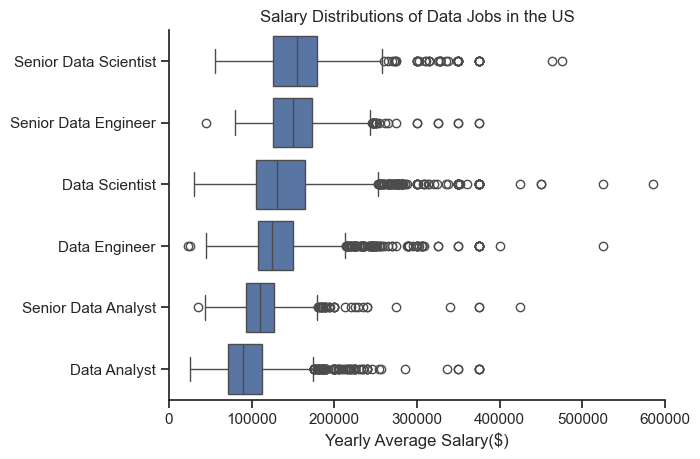

In [17]:
sns.boxplot(data=df_us_6, x='salary_year_avg', y='job_title_short', order= role_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Average Salary($)')
plt.ylabel('')
plt.xlim(0, 600000) 
plt.show()